<a href="https://colab.research.google.com/github/ShotaArima/gradient-newton/blob/master/newton_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $y=x^3-2x^2+x+3$

In [145]:
def f(x):
    return x**3 - 2*x**2 + x + 3

def df(x):
    return 3*x**2 - 4*x + 1

def ddf(x):
    return 6*x - 4

## ニュートン法
$$
x\leftarrow \bar{x}-\cfrac{3\bar{x}^2-4\bar{x}+1}{6\bar{x}-4}
$$
が収束するまで求めていく

In [178]:
def newton(x, tol=1e-11,max_iter=100):
    x = x0
    result_newton = [x]
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        ddfx = ddf(x)
        x_new = x - dfx / ddfx
        result_newton.append(x_new)
        if abs(x_new - x) < tol:
            break
        x = x_new
    return result_newton

## 勾配法

In [188]:
def gradient(x0, h0=0.1, tol=1e-11, max_iter=100):
    x = x0
    h = h0
    result_gradient = []
    result_gradient.append(x)
    for i in range(max_iter):
        dfx = df(x)
        h = mysgn(dfx)*abs(h)
        X = x
        new_X = x + h
        if f(X) < f(new_X):
            while f(X) < f(new_X):
                h = h * 2
                X = new_X
                new_X = X + h
                result_gradient.append(X)
            x = X
            h = h / 2
        else :
          while f(X) > f(new_X):
            h = h / 2
            new_X = new_X - h
            result_gradient.append(new_X)
          x = new_X
          h = h * 2
        # result_gradient.append(new_X)
        if abs(df(x)) < tol:
            break
    return result_gradient

## 結果出力

In [189]:
import numpy as np
import matplotlib.pyplot as plt

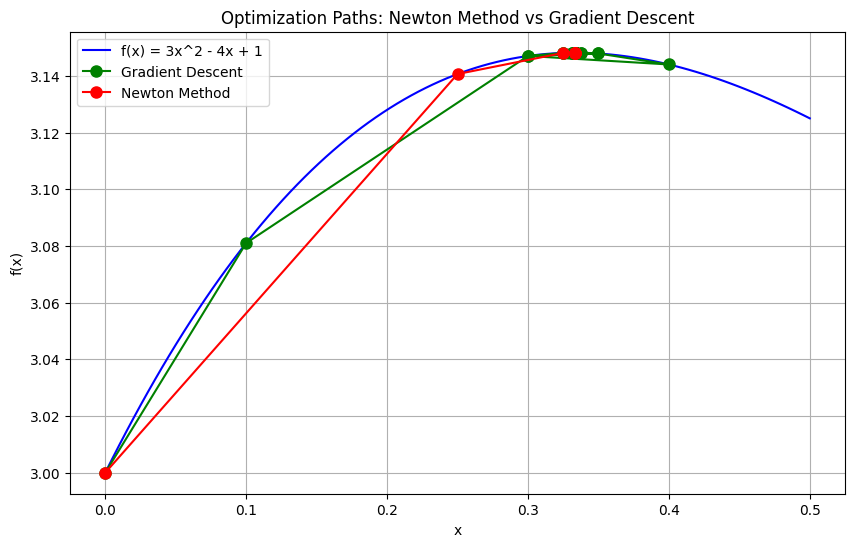

In [190]:
# 初期値
x0 = 0

# 探索軌跡の取得
newton_trajectory = newton(x0)
gd_trajectory = gradient(x0)

# グラフ描画
x_vals = np.linspace(0, 0.5, 100)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))

# 関数のプロット
plt.plot(x_vals, y_vals, label='f(x) = 3x^2 - 4x + 1', color='blue')

# 勾配降下法の軌跡
plt.plot(gd_trajectory, f(np.array(gd_trajectory)), 'go-', label='Gradient Descent', markersize=8)

# ニュートン法の軌跡
plt.plot(newton_trajectory, f(np.array(newton_trajectory)), 'ro-', label='Newton Method', markersize=8)

# グラフの設定
plt.title('Optimization Paths: Newton Method vs Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

# グラフを表示
plt.show()

In [191]:
print("ニュートン法の最終的な解:\t", newton_trajectory[-1],"\tサイズ:", len(newton_trajectory), newton_trajectory)
print("勾配降下法の最終的な解:\t\t", gd_trajectory[-1], "\tサイズ:",len(gd_trajectory), gd_trajectory)

ニュートン法の最終的な解:	 0.3333333333333333 	サイズ: 7 [0, 0.25, 0.325, 0.3332317073170732, 0.3333333178462842, 0.333333333333333, 0.3333333333333333]
勾配降下法の最終的な解:		 0.33333334922790525 	サイズ: 124 [0, 0.1, 0.30000000000000004, 0.4, 0.35000000000000003, 0.3, 0.325, 0.35, 0.33749999999999997, 0.32499999999999996, 0.33124999999999993, 0.33749999999999997, 0.334375, 0.33125, 0.3328125, 0.334375, 0.33359374999999997, 0.33281249999999996, 0.33320312499999993, 0.33359374999999997, 0.3333984375, 0.333203125, 0.33330078125, 0.3333984375, 0.33334960937499997, 0.33330078124999996, 0.33332519531249993, 0.33334960937499997, 0.33333740234375, 0.3333251953125, 0.333331298828125, 0.33333740234375, 0.33333435058593747, 0.33333129882812496, 0.3333328247070312, 0.33333435058593747, 0.33333358764648435, 0.33333282470703124, 0.3333332061767578, 0.33333358764648435, 0.33333339691162106, 0.33333320617675777, 0.3333333015441894, 0.33333339691162106, 0.33333334922790525, 0.33333330154418944, 0.3333333253860474, 0.3333333492

min = -5000117149.075621


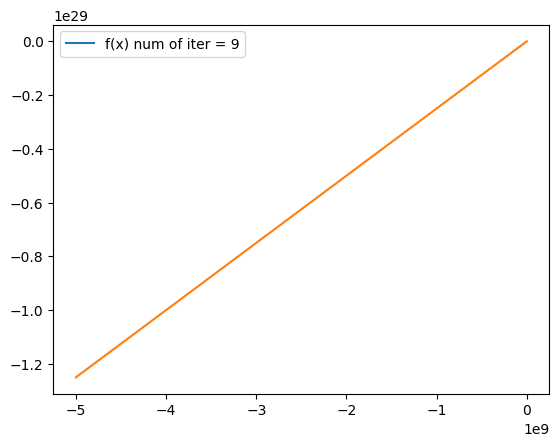

<Figure size 640x480 with 0 Axes>

In [80]:
import numpy as np
from matplotlib import pyplot as plt

def function(x):
	return x ** 3 - 2*x**2 +  x + 3

def diff(x): #数値微分
	dx = 1e-11
	return (function(x+dx) - function(x)) / dx


'''
initX : 初期値
learningRate : 学習率
'''
def gradient(initX,learningRate):
	x = initX
	dx = 1e-11
	dist = np.array([])
	iter = 0
	while True:
		dist = np.append(dist,x)
		if -1 * dx < diff(x) < dx:
			break
		x = x - learningRate * diff(x)
		iter += 1
	return dist,iter


x = np.arange(-4,8,0.1)
y = function(x)
dist,iter = gradient(5,0.1)
plt.plot(x,y,label = 'f(x) num of iter = ' + str(iter))

y = function(dist)
plt.plot(dist,y)
print ('min = ' + str(dist[len(dist) - 1]))#最小値を出力
plt.legend()
plt.show()
plt.savefig('gradient_method.png')

# $ y=-x^2+4x $

In [141]:
def f1(x):
    return -x**2 + 4*x

def df1(x):
    return -2*x+4

def ddf1(x):
    return -2

def mysgn(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

## ニュートン法

In [142]:
def newton1(x, tol=0.1,max_iter=100):
    bar_x = x0
    result_newton = []
    result_newton.append(x)
    for i in range(max_iter):
        bar_x = x
        fx = f1(bar_x)
        dfx = df1(bar_x)
        ddfx = ddf1(bar_x)
        x = bar_x - dfx / ddfx

        if abs(x - bar_x) < tol:
            break
        result_newton.append(x)
    return result_newton

## 勾配法

In [143]:
def gradient1(x0, h0=0.1, tol=0.1, max_iter=100):
    x = x0
    h = h0
    result_gradient = []
    result_gradient.append(x)
    for i in range(max_iter):
        dfx = df1(x)
        h = mysgn(dfx)*abs(h)
        X = x
        new_X = x + h
        if f1(X) < f1(new_X):
            while f1(X) < f1(new_X):
                h = h * 2
                X = new_X
                new_X = X + h
                result_gradient.append(X)
            x = X
            h = h / 2
        else :
          while f1(X) > f1(new_X):
            h = h / 2
            new_X = new_X - h
            result_gradient.append(X)
          x = new_X
          h = h * 2
        # result_gradient.append(new_X)
        if abs(df1(x)) < tol:
            break
    return result_gradient

## 結果

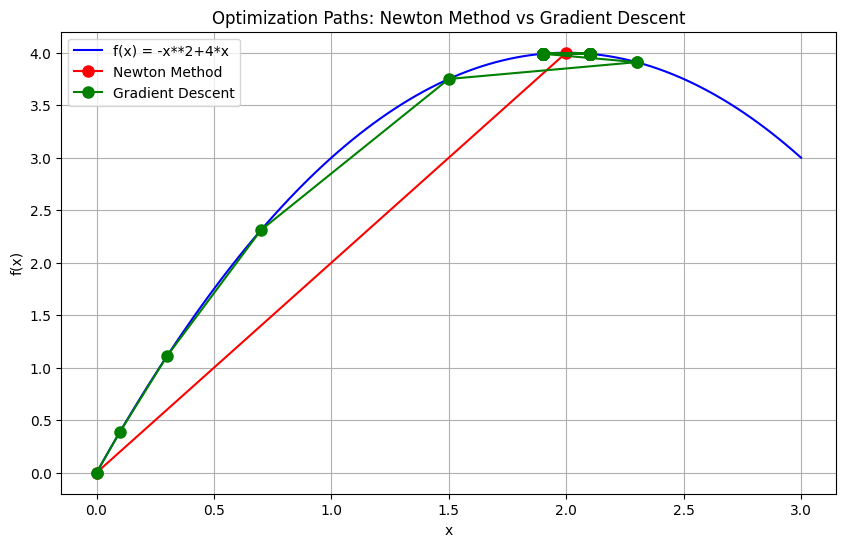

In [144]:
# 初期値
x0 = 0

# 探索軌跡の取得
newton_trajectory = newton1(x0)
gd_trajectory = gradient1(x0)

# グラフ描画
x_vals = np.linspace(0, 3, 100)
y_vals = f1(x_vals)

plt.figure(figsize=(10, 6))

# 関数のプロット
plt.plot(x_vals, y_vals, label='f(x) = -x**2+4*x', color='blue')

# ニュートン法の軌跡
plt.plot(newton_trajectory, f1(np.array(newton_trajectory)), 'ro-', label='Newton Method', markersize=8)

# 勾配降下法の軌跡
plt.plot(gd_trajectory, f1(np.array(gd_trajectory)), 'go-', label='Gradient Descent', markersize=8)

# グラフの設定
plt.title('Optimization Paths: Newton Method vs Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

# グラフを表示
plt.show()

In [137]:
print("ニュートン法の最終的な解:\t", newton_trajectory[-1],"\t\t\tサイズ:", len(newton_trajectory), newton_trajectory)
print("勾配降下法の最終的な解:\t\t", gd_trajectory[-1], "\tサイズ:",len(gd_trajectory), gd_trajectory)
print("f1(1.9000000000000001)",df1(1.9000000000000001))

ニュートン法の最終的な解:	 2.0 			サイズ: 2 [0, 2.0]
勾配降下法の最終的な解:		 1.9000000000000001 	サイズ: 105 [0, 0.1, 0.30000000000000004, 0.7000000000000001, 1.5, 2.3, 2.3, 1.9, 1.9, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.9000000000000001, 2.1, 1.90000000000

min = 2.000026397131478


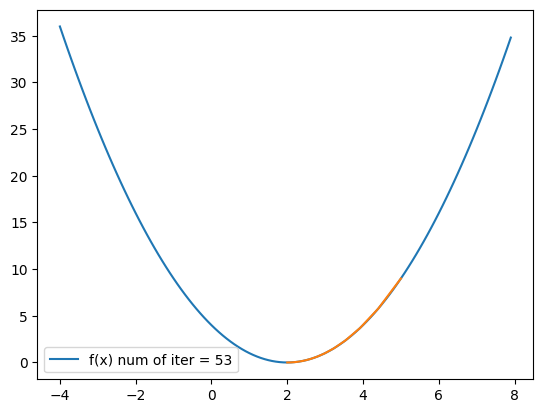

<Figure size 640x480 with 0 Axes>

In [86]:
import numpy as np
from matplotlib import pyplot as plt

def function(x):
	return x ** 2 - 4 * x + 4

def diff(x): #数値微分
	dx = 1e-11
	return (function(x+dx) - function(x)) / dx


'''
initX : 初期値
learningRate : 学習率
'''
def gradient(initX,learningRate):
	x = initX
	dx = 1e-11
	dist = np.array([])
	iter = 0
	while True:
		dist = np.append(dist,x)
		if -1 * dx < diff(x) < dx:
			break
		x = x - learningRate * diff(x)
		iter += 1
	return dist,iter


x = np.arange(-4,8,0.1)
y = function(x)
dist,iter = gradient(5,0.1)
plt.plot(x,y,label = 'f(x) num of iter = ' + str(iter))

y = function(dist)
plt.plot(dist,y)
print ('min = ' + str(dist[len(dist) - 1]))#最小値を出力
plt.legend()
plt.show()
plt.savefig('gradient_method.png')